In [104]:
# Mbike measurements around weather ststaions

In [138]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import sys
from importlib import reload

In [106]:
reload(main)

<module 'main' from '/Users/lisawink/Documents/freiburg/src/main.py'>

In [107]:
sys.path.append("../../src")
import main
import vis

In [108]:
# import weather station network data
stations = pd.read_csv("/Users/lisawink/Documents/paper1/data/Freiburg-Street-Level-Weather-Station-Network-MetaData-V1-0.csv")

In [109]:
stns = main.buffer_stations(stations, 50)

In [110]:
mbike1 = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/ALL-SYSTEMS-2023-06-27.csv')
mbike2 = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/ALL-SYSTEMS-2023-06-14.csv')
mbike3 = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/ALL-SYSTEMS-2024-06-12.csv')
mbike4 = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/ALL-SYSTEMS-2024-06-18.csv')

In [111]:
mbike1 = main.convert_to_point(mbike1, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'Latitude', lon_column = 'Longitude')
mbike2 = main.convert_to_point(mbike2, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'Latitude', lon_column = 'Longitude')
mbike3 = main.convert_to_point(mbike3, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'Latitude', lon_column = 'Longitude')
mbike4 = main.convert_to_point(mbike4, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'Latitude', lon_column = 'Longitude')

In [112]:
mbike2

,System_ID,Time_UTC,Seconds_in_day,Altitude,Latitude,Longitude,Temperature_diff_K,Absolute_temperature_degC,Relhumidity_diff_percent,Relhumidity_percent,Vapourpressure_diff_hPa,Vapourpressure_hPa,geometry
0,1,2023-06-14T19:38:31.000Z,70711,272.9,47.993628,7.845237,1.77,24.05,-4.0,35.5,0.200,10.818,POINT (4190046.212 5325636.878)
1,1,2023-06-14T19:38:38.000Z,70718,272.4,47.993898,7.845475,1.36,23.63,-4.2,35.3,-0.147,10.471,POINT (4190065.59 5325665.933)
2,1,2023-06-14T19:38:44.000Z,70724,270.1,47.994215,7.845535,1.26,23.53,-4.1,35.4,-0.182,10.435,POINT (4190071.969 5325700.929)
3,1,2023-06-14T19:38:51.000Z,70731,270.4,47.994523,7.845640,1.16,23.43,-3.8,35.7,-0.161,10.457,POINT (4190081.651 5325734.743)
4,1,2023-06-14T19:38:57.000Z,70737,272.2,47.994795,7.845722,1.05,23.33,-3.6,35.9,-0.169,10.449,POINT (4190089.401 5325764.649)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,41,2023-06-14T21:06:15.000Z,75975,284.6,47.993190,7.846485,0.32,20.82,-1.0,45.3,0.120,11.274,POINT (4190136.702 5325583.164)
7603,41,2023-06-14T21:06:42.000Z,76001,293.9,47.993452,7.845967,0.11,20.61,-1.5,44.8,-0.145,11.009,POINT (4190099.624 5325614.374)
7604,41,2023-06-14T21:06:51.000Z,76011,296.5,47.993482,7.845765,0.01,20.51,-1.5,44.8,-0.211,10.943,POINT (4190084.732 5325618.522)
7605,41,2023-06-14T21:07:05.000Z,76024,299.2,47.993503,7.845450,0.13,20.61,-1.7,44.8,-0.186,11.009,POINT (4190061.354 5325622.125)


In [113]:
joined1 = mbike1.sjoin(stns,predicate='within',how='inner')
joined2 = mbike2.sjoin(stns,predicate='within',how='inner')
joined3 = mbike3.sjoin(stns,predicate='within',how='inner')
joined4 = mbike4.sjoin(stns,predicate='within',how='inner')

In [114]:
df1 = joined1[['Absolute_temperature_degC','station_id']].groupby('station_id').aggregate(['mean', 'std', 'count'])
df2 = joined2[['Absolute_temperature_degC','station_id']].groupby('station_id').aggregate(['mean', 'std', 'count'])
df3 = joined3[['Absolute_temperature_degC','station_id']].groupby('station_id').aggregate(['mean', 'std', 'count'])
df4 = joined4[['Absolute_temperature_degC','station_id']].groupby('station_id').aggregate(['mean', 'std', 'count'])

In [115]:
df1 = df1.droplevel(0, axis=1)
df2 = df2.droplevel(0, axis=1)
df3 = df3.droplevel(0, axis=1)
df4 = df4.droplevel(0, axis=1)

In [116]:
temp = pd.read_csv('/Users/lisawink/Documents/paper1/data/raw_data/marvin_2024.csv')
temp['datetime']=pd.to_datetime(temp['datetime'])
#temp = temp[temp['variable']=='ta']
#temp = temp[temp['data_type'] == 'observed']

In [117]:
temp

,datetime,station_id,ta,vp
0,2022-09-01 00:00:00+00:00,FRASHA,14.629891,1.441245
1,2022-09-01 00:00:00+00:00,FRBETZ,16.713000,1.459968
2,2022-09-01 00:00:00+00:00,FRBRUH,16.285000,1.484469
3,2022-09-01 00:00:00+00:00,FRDIET,13.840833,1.580545
4,2022-09-01 00:00:00+00:00,FRDREI,16.611667,1.495245
...,...,...,...,...
736885,2024-09-01 00:00:00+00:00,FRWEIN,21.804667,1.974577
736886,2024-09-01 00:00:00+00:00,FRWILD,19.727333,2.296735
736887,2024-09-01 00:00:00+00:00,FRWITT,22.871000,1.939729
736888,2024-09-01 00:00:00+00:00,FRWSEE,20.290667,2.013700


In [118]:
'''
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']
temp = temp[temp['data_type'] == 'observed']
'''


"\ntemp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')\ntemp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])\ntemp = temp[temp['variable']=='Ta_deg_C']\ntemp = temp[temp['data_type'] == 'observed']\n"

In [119]:
# 10pm CEST is 8pm UTC
aws1 = temp[temp['datetime']==	'2023-06-27 20:00:00+00:00']
aws2 = temp[temp['datetime']==	'2023-06-14 20:00:00+00:00']
aws3 = temp[temp['datetime']==	'2024-06-12 20:00:00+00:00']
aws4 = temp[temp['datetime']==	'2024-06-18 20:00:00+00:00']

In [120]:
compare1 = df1.merge(aws1,how='left', left_on='station_id', right_on='station_id')
compare2 = df2.merge(aws2,how='left', left_on='station_id', right_on='station_id')
compare3 = df3.merge(aws3,how='left', left_on='station_id', right_on='station_id')
compare4 = df4.merge(aws4,how='left', left_on='station_id', right_on='station_id')

In [121]:
# temp_diff is meteobike measurement - aws measurement
compare1['temp_diff'] = compare1['mean'] - compare1['ta']
compare2['temp_diff'] = compare2['mean'] - compare2['ta']
compare3['temp_diff'] = compare3['mean'] - compare3['ta']
compare4['temp_diff'] = compare4['mean'] - compare4['ta']

In [130]:
compare1

,station_id,mean,std,count,datetime,ta,vp,temp_diff
0,FRASHA,18.437500,0.115866,4,2023-06-27 20:00:00+00:00,20.068333,1.183639,-1.630833
1,FRBETZ,21.560000,NaN,1,2023-06-27 20:00:00+00:00,21.517000,1.066523,0.043000
2,FRDIET,18.710000,0.070711,2,2023-06-27 20:00:00+00:00,18.996833,1.208193,-0.286833
3,FRDREI,20.937500,1.931759,4,2023-06-27 20:00:00+00:00,21.730000,1.141748,-0.792500
4,FRGART,22.370000,NaN,1,2023-06-27 20:00:00+00:00,21.442500,1.087574,0.927500
5,FRGUNT,17.920000,NaN,1,2023-06-27 20:00:00+00:00,18.330000,1.310260,-0.410000
6,FRHAID,21.695000,0.148492,2,2023-06-27 20:00:00+00:00,21.752000,1.129227,-0.057000
7,FRHBHF,22.346667,0.594671,3,2023-06-27 20:00:00+00:00,21.665167,1.050740,0.681500
8,FRHERD,21.026667,1.000067,3,2023-06-27 20:00:00+00:00,21.301667,1.128426,-0.275000
9,FRHOCH,19.210000,0.000000,3,2023-06-27 20:00:00+00:00,19.294667,1.134854,-0.084667


In [122]:
compare4

,station_id,mean,std,count,datetime,ta,vp,temp_diff
0,FRASHA,23.400000,0.000000,2,2024-06-18 20:00:00+00:00,22.826667,2.034221,0.573333
1,FRBETZ,24.125000,0.363731,4,2024-06-18 20:00:00+00:00,23.886833,1.866475,0.238167
2,FRBRUH,25.846000,0.121984,5,2024-06-18 20:00:00+00:00,26.188333,1.817610,-0.342333
3,FRDIET,21.910000,NaN,1,2024-06-18 20:00:00+00:00,22.890000,1.842783,-0.980000
4,FRDREI,22.650000,NaN,1,2024-06-18 20:00:00+00:00,24.060000,2.028953,-1.410000
5,FRGART,23.442500,0.454120,4,2024-06-18 20:00:00+00:00,23.609167,1.791691,-0.166667
6,FRGUNT,20.742500,0.701207,4,2024-06-18 20:00:00+00:00,21.083333,1.983454,-0.340833
7,FRHAID,23.715000,0.219203,2,2024-06-18 20:00:00+00:00,24.525667,1.633819,-0.810667
8,FRHBHF,24.106667,0.273008,3,2024-06-18 20:00:00+00:00,24.816333,1.753448,-0.709667
9,FRHERD,24.137500,0.264244,4,2024-06-18 20:00:00+00:00,24.283333,1.826015,-0.145833


In [123]:
for i in [compare1, compare2, compare3, compare4]:
    print('avg_diff=',i['temp_diff'].mean())
    rmse = np.sqrt((i['temp_diff']*i['temp_diff']).mean())
    print('rmse=', rmse)
    # mean absolute error
    mae = (i['temp_diff'].abs()).mean()
    print('mae=', mae)


avg_diff= -0.24361446809523757
rmse= 0.9444299243934149
mae= 0.7215631865567762
avg_diff= -0.9040965435070709
rmse= 1.3597597942802577
mae= 1.1001498771070706
avg_diff= -0.4460031163153308
rmse= 0.7205564767745491
mae= 0.6340945072560976
avg_diff= -0.44913461467033006
rmse= 0.7666054263885593
mae= 0.6517463360439563


In [131]:
vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_300.parquet')

In [139]:
compare4_vars = compare4.merge(vars, how='left', left_on='station_id', right_on='station_id')
compare1_vars = compare1.merge(vars, how='left', left_on='station_id', right_on='station_id')
compare2_vars = compare2.merge(vars, how='left', left_on='station_id', right_on='station_id')
compare3_vars = compare3.merge(vars, how='left', left_on='station_id', right_on='station_id')

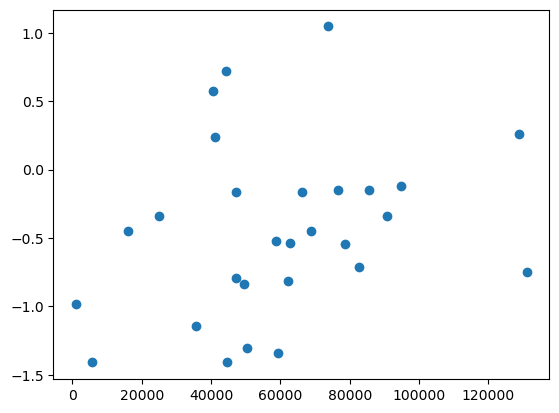

In [136]:
import matplotlib.pyplot as plt
plt.scatter(compare4_vars['BuAre_sum'], compare4_vars['temp_diff'])

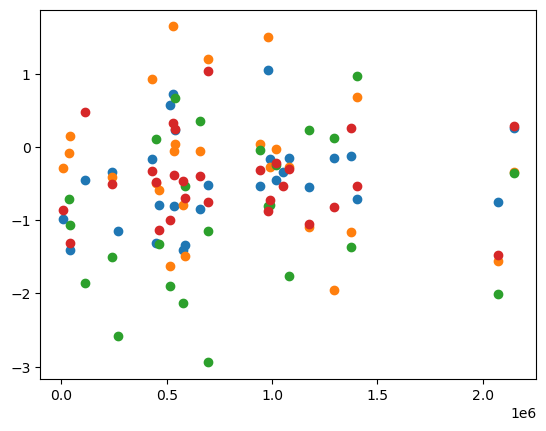

In [141]:
plt.scatter(compare4_vars['BuVol_3D_sum'], compare4_vars['temp_diff'])
plt.scatter(compare1_vars['BuVol_3D_sum'], compare1_vars['temp_diff'])
plt.scatter(compare2_vars['BuVol_3D_sum'], compare2_vars['temp_diff'])
plt.scatter(compare3_vars['BuVol_3D_sum'], compare3_vars['temp_diff'])

In [124]:
# rmse
import numpy as np
rmse = np.sqrt((compare['temp_diff']*compare['temp_diff']).mean())

In [125]:
rmse

0.9233107164999936

In [126]:
#mbe
mbe = compare['temp_diff'].mean()

In [127]:
mbe

-0.1131529304029297

In [128]:
# mean absolute error
mae = (compare['temp_diff'].abs()).mean()

In [129]:
mae

0.6920631868131862